In [2]:
import pandas as pd
import numpy as np
import os
from dotenv import dotenv_values, find_dotenv
import datetime as dt
import preparecorrelations as pc
pd.set_option('display.max_columns', None)
import regressions as reg

In [3]:
import importlib
importlib.reload(pc)
importlib.reload(reg)

<module 'regressions' from 'c:\\Users\\fuem\\Documents\\correlationmodule\\regressions.py'>

# module demo: various data and detrending techniques

In [4]:
# this looks for your configuration file and then reads it as a dictionary
config = dotenv_values(find_dotenv())

# set path using the dictionary key for which one you want
correlationpath = os.path.abspath(config["CORRELATIONDATA"]) + '\\'
cleandatapath = os.path.abspath(config["CLEANDATA"]) + '\\'
rawdatapath = os.path.abspath(config["RAWDATA"]) + '\\'
ocadatapath = os.path.abspath(config["FRANKELROSEDATA"]) + '\\'

In [5]:
# import haver data
xlsx = pd.ExcelFile(correlationpath + "gdp_consumption_haver_final.xlsx")
# haver real gdp
rgdp = pd.read_excel(xlsx, 'Real GDP')
# haver real consumption
rc = pd.read_excel(xlsx, 'Real C')

# oecd employment
oecdemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LREM64TT.STSA.Q/OECD")
# oecd unemployment
oecdunemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LRUN64TT.STSA.Q/OECD")

# imf industrial production index
imfipi = pc.get_from_imf('CompactData/IFS/Q..AIP_SA_IX')


In [6]:
# the developed countries included in the gdp/consumption series
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", 
                  "Italy", "Japan", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", 
                  "Turkey", "U.K.", "U.S."] 

# the EMEs included in the gdp/consumption series
MSCI_EM_countries = ["Brazil", "Chile", "China", "Colombia", "Czech Republic", "Egypt", "Greece", "Hungary", "India", 
                     "Indonesia", "South Korea", "Kuwait", "Malaysia", "Mexico", "Peru", "Philippines", "Poland", "Qatar", 
                     "Saudi Arabia", "South Africa", "Taiwan", "Thailand", "Turkey", "United Arab Emirates"]

# some countries we wanted to remove from the GDP/consumption series for not having enough data (decided previously)
to_remove = ['Egypt', 'Saudi Arabia', 'Malaysia', 'Colombia', 'Qatar', 'Kuwait', 'China']

# the countries that will be used for the gdp/consumption stuff
original_countries = list(set(oecd_countries + MSCI_EM_countries) - set(to_remove))

# countries from richmond paper figures
allrichmondcountries = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'IND', 'IDN', 'IRL', 'ITA', 'JPN', 'KWT', 'MYS', 'MEX', 'NLD', 
                        'NZL', 'NOR', 'PHL', 'POL', 'PRT', 'KOR', 'SAU', 'SGP', 'ZAF', 'ESP', 'SWE', 'CHE', 'THA', 'TUR', 'ARE', 'GBR', 'USA']

# countries from frankel and rose paper
frankelrosecountries = ['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'JPN', 'NOR', 'NLD', 'NZL', 'PRT', 'ESP', 'SWE', 'CHE', 'GBR', 'USA']

## Haver data: Real GDP, HP Filter

In [7]:
# seasonally adjusting the gdp series (imf/oecd data are already seasonally adjusted)
rgdp_sa = pc.SeasonalAdjustment(pc.fixCols(rgdp, original_countries))

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.3 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 NOTE: Unable to test LS2008.4 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other reg

In [8]:
# show the detrended data

rgdp_detrend = pc.Prepare_Correlations(rgdp_sa, detrending="HP Filter", countries=list(rgdp_sa.columns)).detrend(start_date="1998-01-01", end_date="2021-12-31")

rgdp_detrend.data.tail()

,AUS,AUT,BEL,CAN,DNK,FIN,FRA,DEU,GRC,ISL,IRL,ITA,JPN,LUX,NLD,NOR,PRT,ESP,SWE,CHE,GBR,USA,BRA,CHL,CZE,HUN,IND,IDN,KOR,MEX,PER,PHL,POL,ZAF,TWN,THA,TUR
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.006839,-0.034697,-0.020587,-0.008219,-0.016501,-0.007959,-0.014218,-0.008470,-0.038582,-0.035878,-0.037905,-0.025400,-0.003766,-0.011825,-0.023778,-0.012821,-0.020631,-0.028084,-0.019023,-0.012994,-0.024045,-0.016842,0.003531,-0.030358,-0.021741,-0.022619,0.025446,-0.016025,-0.014039,-0.009491,-0.001225,-0.041663,-0.026234,-0.005990,0.005214,-0.018284,0.008710
2021-01-01,0.007023,-0.040516,-0.010225,0.002295,-0.018020,-0.014397,-0.013196,-0.023081,0.003967,-0.024683,0.020385,-0.018077,-0.008639,0.019443,-0.028900,-0.011302,-0.049999,-0.031067,-0.008635,-0.015575,-0.037156,-0.005986,0.016313,0.000551,-0.026649,-0.012565,0.031235,-0.009807,-0.001409,-0.002360,0.021121,-0.031369,-0.019726,0.005607,0.029754,-0.016387,0.022995
2021-04-01,0.009913,-0.000377,0.004919,-0.007714,-0.002474,0.001154,-0.002404,-0.001939,0.012766,-0.000505,0.028393,0.003262,-0.000757,0.012043,0.004534,-0.007801,-0.007738,-0.018122,-0.004163,-0.001174,0.017095,0.007198,0.017532,0.010635,-0.015767,0.002979,-0.101502,-0.012693,0.001934,0.010403,0.024913,-0.036140,-0.008252,0.019332,0.011702,-0.015773,-0.013848
2021-07-01,-0.012174,0.032541,0.023173,0.003378,0.006495,0.010015,0.027470,0.011868,0.029161,-0.000728,0.030776,0.026595,0.000170,0.011360,0.020251,0.026611,0.017443,0.009554,0.011151,0.013620,0.026516,0.010359,0.017166,0.052483,-0.000866,0.006632,0.000976,-0.023498,0.000836,0.004429,0.060348,-0.010720,0.007099,0.003567,0.007841,-0.021880,0.035527
2021-10-01,0.018754,0.019176,0.026304,0.017298,0.031741,0.015031,0.034792,0.009451,0.033290,-0.003675,-0.017823,0.039878,0.007820,0.011506,0.024767,0.020788,0.033230,0.032948,0.018992,0.014512,0.040928,0.021324,0.013964,0.062210,0.005748,0.019344,0.053022,0.007304,0.006990,0.010652,0.015421,0.014687,0.017687,0.016061,0.009898,-0.000818,0.051017


In [9]:
# show the correlation matrix

rgdpcorrelations = rgdp_detrend.get_correlationmatrix()

rgdpcorrelations

,USA,MEX,BEL,CAN,GBR,FRA,DNK,HUN,AUT,ZAF,SWE,JPN,ITA,CHE,DEU,ESP,CHL,NLD,PHL,CZE,IND,AUS,PER,FIN,PRT,POL,NOR,TUR,LUX,THA,ISL,KOR,BRA,TWN,GRC,IRL,IDN
USA,1.000000,0.918096,0.907854,0.902947,0.888706,0.857161,0.848856,0.847672,0.842206,0.839220,0.837735,0.825073,0.814819,0.792193,0.776853,0.770042,0.763758,0.758481,0.751891,0.747918,0.746826,0.741762,0.730112,0.716743,0.714004,0.710708,0.684739,0.682134,0.672836,0.627790,0.607812,0.603793,0.577605,0.540587,0.482172,0.473307,0.354208
MEX,0.918096,1.000000,0.911767,0.917000,0.905838,0.883857,0.829223,0.857352,0.867716,0.904258,0.836785,0.838937,0.871488,0.806342,0.859655,0.825544,0.788633,0.796938,0.793231,0.788571,0.794751,0.747536,0.799998,0.759087,0.752021,0.726514,0.665902,0.666265,0.656257,0.647998,0.640127,0.594537,0.598535,0.433907,0.489255,0.437614,0.456655
BEL,0.907854,0.911767,1.000000,0.890056,0.938824,0.953072,0.806018,0.842316,0.917148,0.892798,0.832460,0.772518,0.944722,0.844131,0.844117,0.892686,0.769410,0.850089,0.792086,0.778655,0.815847,0.741598,0.832585,0.714789,0.859486,0.811446,0.688902,0.609940,0.687071,0.620712,0.563099,0.659848,0.634180,0.444030,0.574462,0.453749,0.475976
CAN,0.902947,0.917000,0.890056,1.000000,0.876441,0.895835,0.781543,0.859490,0.868690,0.889647,0.776652,0.781138,0.835737,0.774362,0.826695,0.783973,0.762079,0.773772,0.787622,0.724496,0.772741,0.748245,0.787575,0.699859,0.749447,0.716932,0.665233,0.612896,0.600225,0.610395,0.575220,0.627902,0.699747,0.417210,0.446685,0.308742,0.487912
GBR,0.888706,0.905838,0.938824,0.876441,1.000000,0.931814,0.771252,0.894971,0.889862,0.925039,0.771206,0.775390,0.910521,0.771229,0.809396,0.899317,0.793213,0.790442,0.831251,0.759692,0.813939,0.795619,0.875744,0.646001,0.833947,0.729846,0.673931,0.603254,0.617159,0.634845,0.589733,0.522185,0.557895,0.312487,0.624738,0.403150,0.479769
FRA,0.857161,0.883857,0.953072,0.895835,0.931814,1.000000,0.771765,0.822033,0.914174,0.885474,0.767943,0.740574,0.956209,0.807781,0.840784,0.891508,0.752862,0.827073,0.770815,0.745476,0.820094,0.724347,0.869559,0.681913,0.861717,0.766132,0.665426,0.585344,0.627232,0.594056,0.546500,0.558974,0.640300,0.333629,0.526300,0.368111,0.440882
DNK,0.848856,0.829223,0.806018,0.781543,0.771252,0.771765,1.000000,0.777366,0.829404,0.734807,0.876864,0.773084,0.806763,0.835917,0.855380,0.736877,0.693970,0.835491,0.632240,0.819389,0.636044,0.531467,0.576346,0.830003,0.691779,0.676330,0.646092,0.634963,0.677362,0.493647,0.685422,0.619305,0.425693,0.511811,0.392924,0.499816,0.317108
HUN,0.847672,0.857352,0.842316,0.859490,0.894971,0.822033,0.777366,1.000000,0.836240,0.877889,0.786638,0.800265,0.828016,0.752497,0.793389,0.833679,0.767981,0.730526,0.800170,0.836760,0.731181,0.682270,0.742627,0.671203,0.746477,0.679138,0.642816,0.626699,0.528695,0.582281,0.624920,0.454164,0.569603,0.324456,0.606855,0.453428,0.509491
AUT,0.842206,0.867716,0.917148,0.868690,0.889862,0.914174,0.829404,0.836240,1.000000,0.844594,0.808670,0.746435,0.915650,0.857679,0.898361,0.871740,0.754411,0.907789,0.779659,0.832778,0.722891,0.680075,0.772240,0.803774,0.848439,0.835495,0.682889,0.532475,0.632177,0.599263,0.671554,0.610324,0.570082,0.329595,0.503546,0.367606,0.470159
ZAF,0.839220,0.904258,0.892798,0.889647,0.925039,0.885474,0.734807,0.877889,0.844594,1.000000,0.719085,0.752975,0.841464,0.768635,0.798696,0.830576,0.808529,0.755779,0.775330,0.753260,0.789611,0.784437,0.887190,0.649734,0.744678,0.694382,0.673340,0.617878,0.592791,0.592087,0.607104,0.476668,0.659437,0.289539,0.583527,0.365208,0.553559


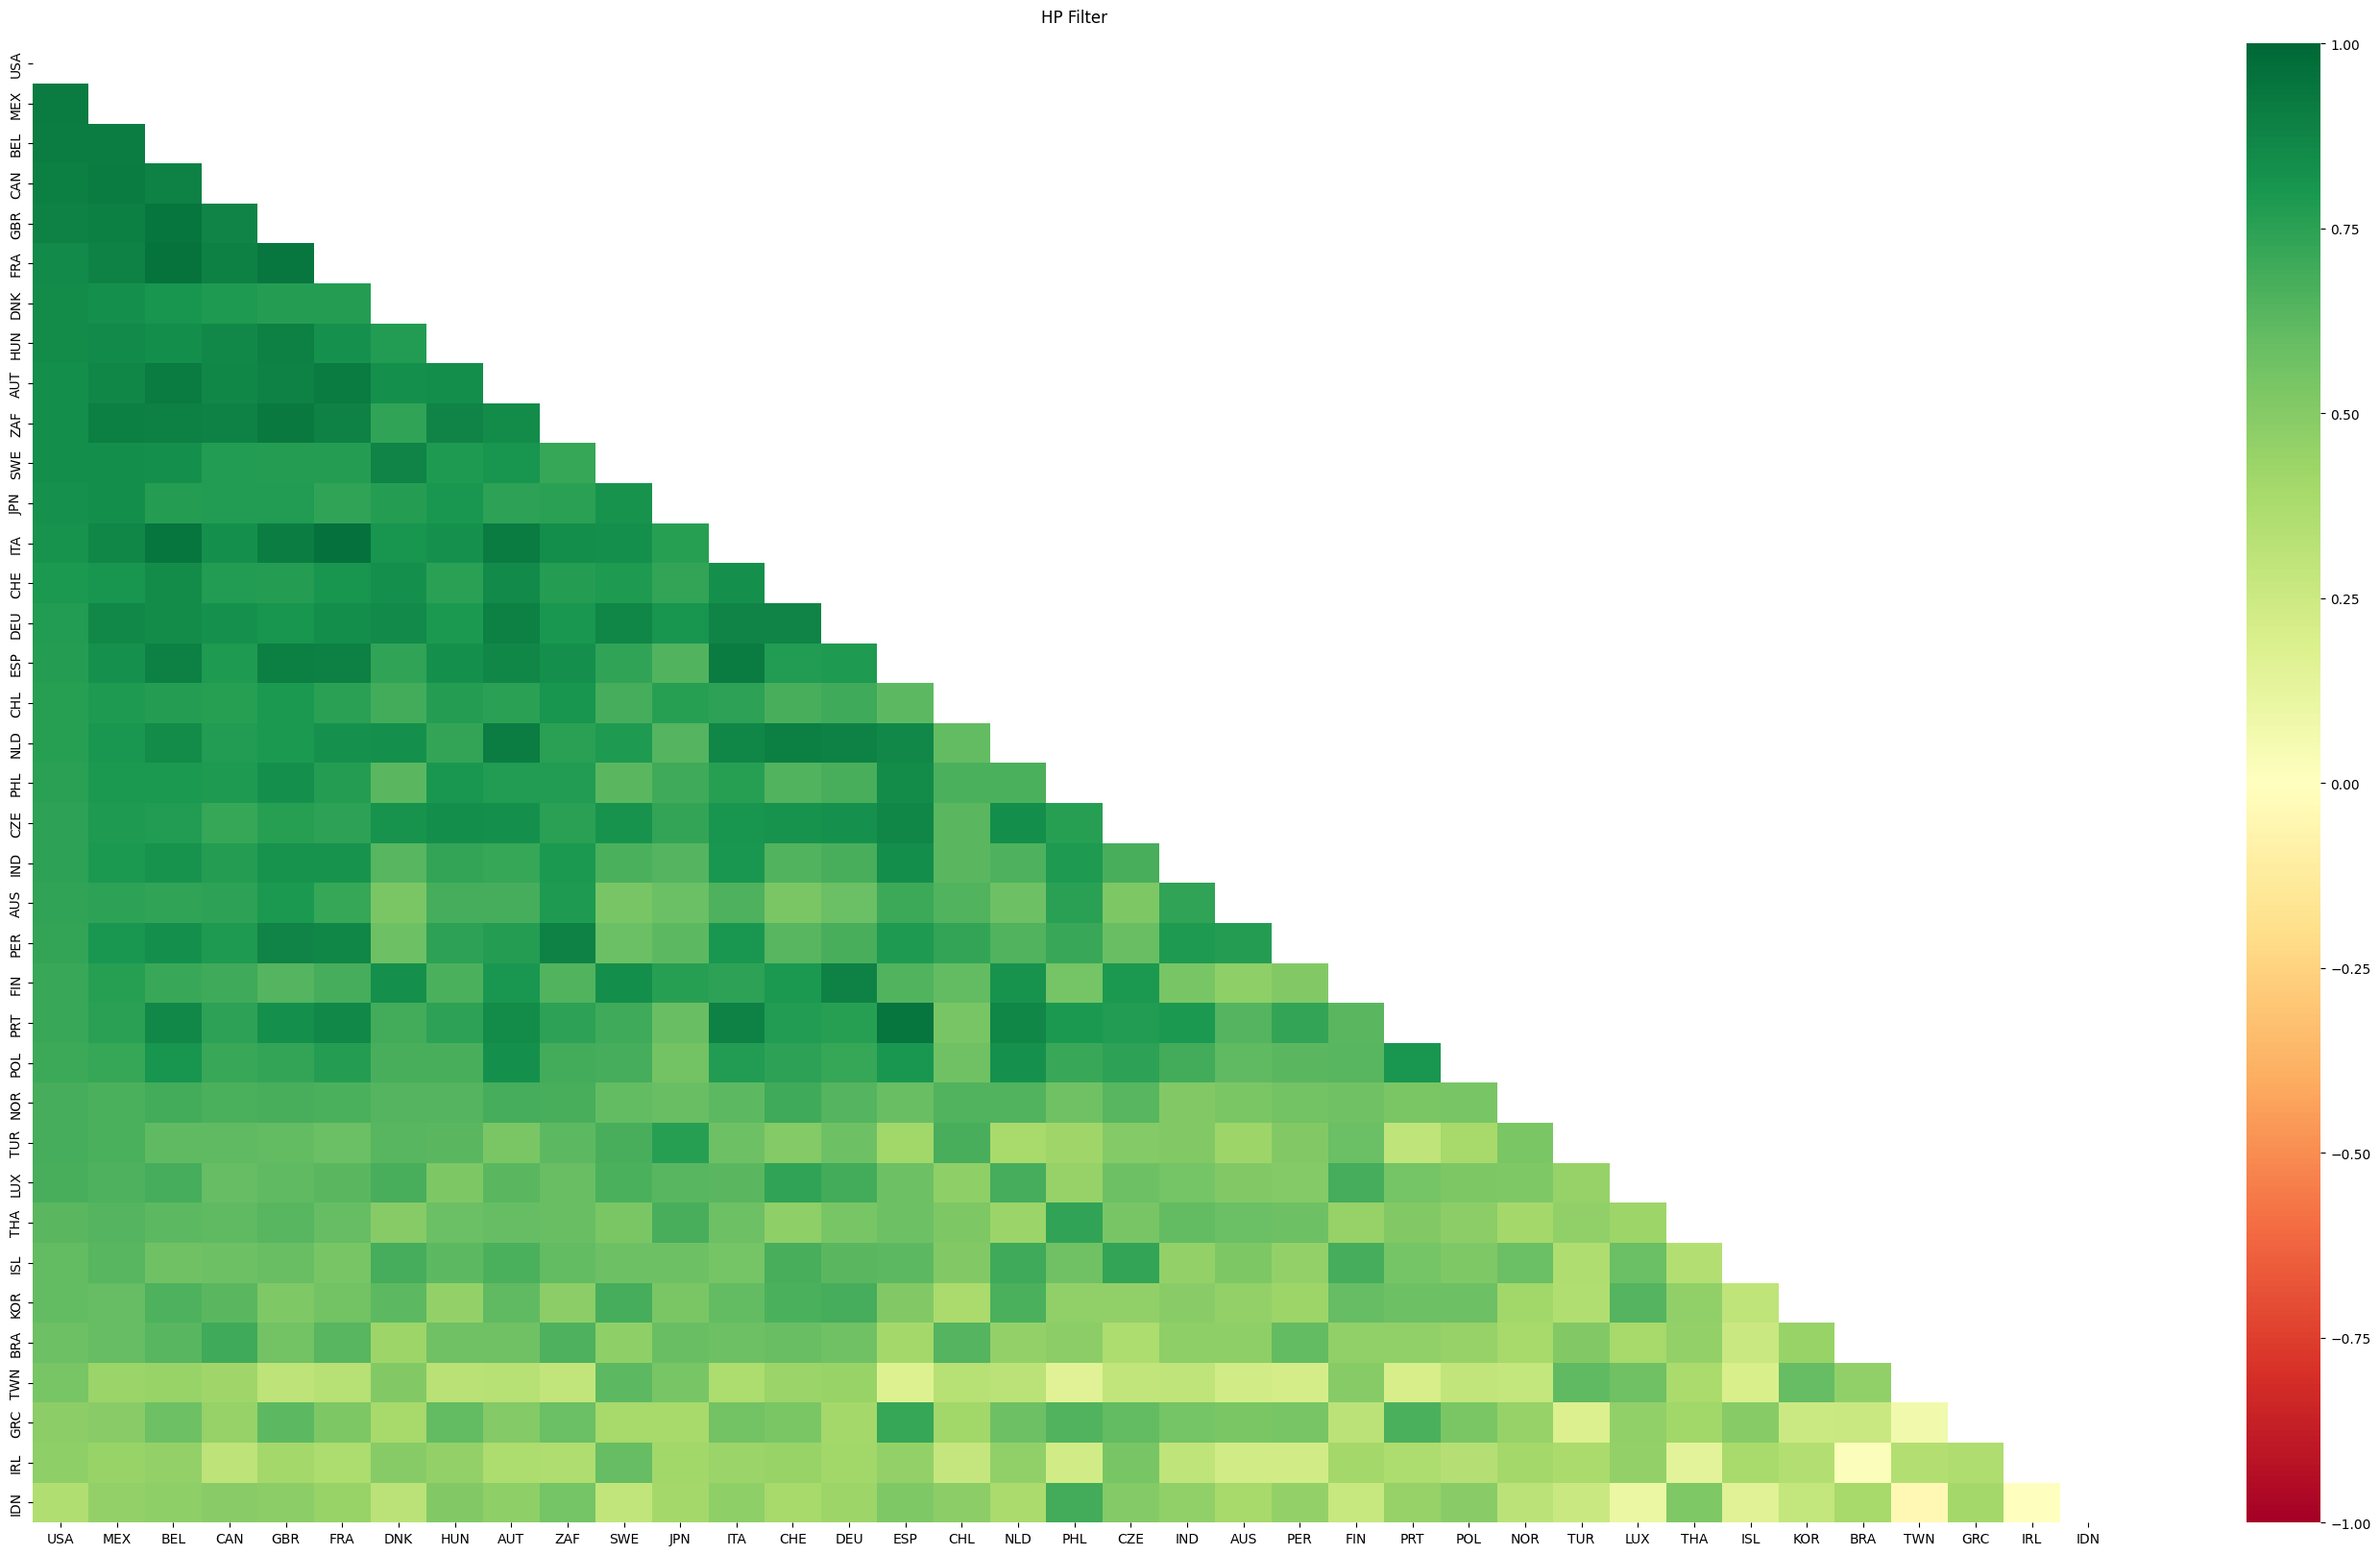

In [10]:

# show the heatmap visualisation

rgdpheatmap = rgdp_detrend.get_heatmap()

In [11]:
# show the reshaped version

rgdpreshaped = rgdp_detrend.get_organized()

rgdpreshaped.tail()

,iso3_firstcountry,iso3_secondcountry,correlation
1256,TWN,IRL,0.350499
1257,TWN,IDN,-0.045611
1293,GRC,IRL,0.366505
1294,GRC,IDN,0.403062
1331,IRL,IDN,0.006740


## OECD data: employment rate, first differences

In [12]:
# show the detrended data

oecdemploymentdetrend = pc.Prepare_Correlations(oecdemployment, detrending="first difference", countries=frankelrosecountries).detrend(start_date="1998-01-01", end_date="2021-12-31")

oecdemploymentdetrend.data.tail()

,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,GBR,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.020318,-0.002158,-0.007761,0.024750,0.006314,0.007662,0.006535,0.006572,0.004509,0.005343,-0.004609,-0.031442,0.005114,0.005268,0.004007,0.004646,0.005792,0.005907,0.011974,0.002928,0.022168
2021-01-01,0.010702,-0.005550,-0.005444,-0.000923,-0.015866,-0.001915,-0.004750,0.002124,0.004210,0.004572,0.001228,-0.001596,-0.006199,-0.011254,0.003236,0.002399,0.003801,0.007751,-0.004738,-0.002946,0.007604
2021-04-01,0.011130,0.008960,0.022152,0.006443,-0.006855,0.009305,0.022095,0.021085,0.015886,0.008791,0.004655,0.063860,0.045954,0.022085,0.000797,0.005199,0.014655,0.009879,0.020991,0.011805,0.007637
2021-07-01,-0.004767,0.015657,0.017938,0.018633,0.012557,0.012854,-0.001093,0.013857,-0.000609,0.006593,0.004214,0.028315,0.034523,0.015428,0.002731,0.007243,0.012122,0.015087,0.011396,0.004151,0.012247
2021-10-01,0.006611,0.004520,-0.003100,0.014749,0.008898,0.002737,0.013599,0.007882,0.009706,0.002545,0.001778,0.007707,0.013558,0.009893,-0.000868,0.005305,0.006163,0.002519,0.001087,0.005971,0.011098


In [13]:
# show the correlation matrix

oecdemploymentmatrix = oecdemploymentdetrend.get_correlationmatrix()

oecdemploymentmatrix

,USA,CAN,AUS,IRL,ESP,AUT,GRC,ITA,FRA,FIN,CHE,JPN,PRT,SWE,NOR,BEL,DNK,NLD,GBR,DEU,NZL
USA,1.000000,0.952678,0.865939,0.758840,0.700108,0.647509,0.643072,0.590617,0.522298,0.511488,0.502357,0.492607,0.473912,0.472621,0.428666,0.276015,0.250626,0.231341,0.202697,0.198878,0.153473
CAN,0.952678,1.000000,0.837190,0.712995,0.662053,0.672435,0.690388,0.569853,0.467312,0.482824,0.528502,0.380602,0.426120,0.414706,0.354502,0.272087,0.195856,0.201092,0.081529,0.256708,0.095444
AUS,0.865939,0.837190,1.000000,0.640035,0.661396,0.577038,0.555282,0.513900,0.528282,0.521524,0.372319,0.440501,0.444217,0.453851,0.415465,0.276204,0.195640,0.199388,0.152152,0.211368,0.147777
IRL,0.758840,0.712995,0.640035,1.000000,0.819984,0.586690,0.651884,0.682331,0.629057,0.628224,0.428912,0.505374,0.631164,0.647781,0.559506,0.386038,0.453346,0.175722,0.391150,0.393884,0.379245
ESP,0.700108,0.662053,0.661396,0.819984,1.000000,0.513420,0.692812,0.739244,0.637473,0.603602,0.444640,0.470181,0.719936,0.586340,0.411414,0.343272,0.476583,0.093657,0.350340,0.378359,0.352601
AUT,0.647509,0.672435,0.577038,0.586690,0.513420,1.000000,0.585282,0.313442,0.441045,0.462640,0.438094,0.345125,0.314235,0.415553,0.422194,0.350573,0.210111,0.179142,0.102970,0.321953,0.042301
GRC,0.643072,0.690388,0.555282,0.651884,0.692812,0.585282,1.000000,0.590092,0.391438,0.369155,0.222367,0.254915,0.455570,0.282189,0.294862,0.345432,0.334553,0.189995,0.103804,0.153440,0.081924
ITA,0.590617,0.569853,0.513900,0.682331,0.739244,0.313442,0.590092,1.000000,0.573247,0.474683,0.497543,0.265356,0.620858,0.546761,0.438063,0.287613,0.490527,0.282072,0.336053,0.390564,0.315062
FRA,0.522298,0.467312,0.528282,0.629057,0.637473,0.441045,0.391438,0.573247,1.000000,0.754015,0.308047,0.470062,0.736983,0.630654,0.523877,0.355295,0.494515,-0.019333,0.384100,0.483852,0.293316
FIN,0.511488,0.482824,0.521524,0.628224,0.603602,0.462640,0.369155,0.474683,0.754015,1.000000,0.277059,0.371718,0.472780,0.669421,0.523321,0.254590,0.462768,0.167429,0.338671,0.440337,0.168883


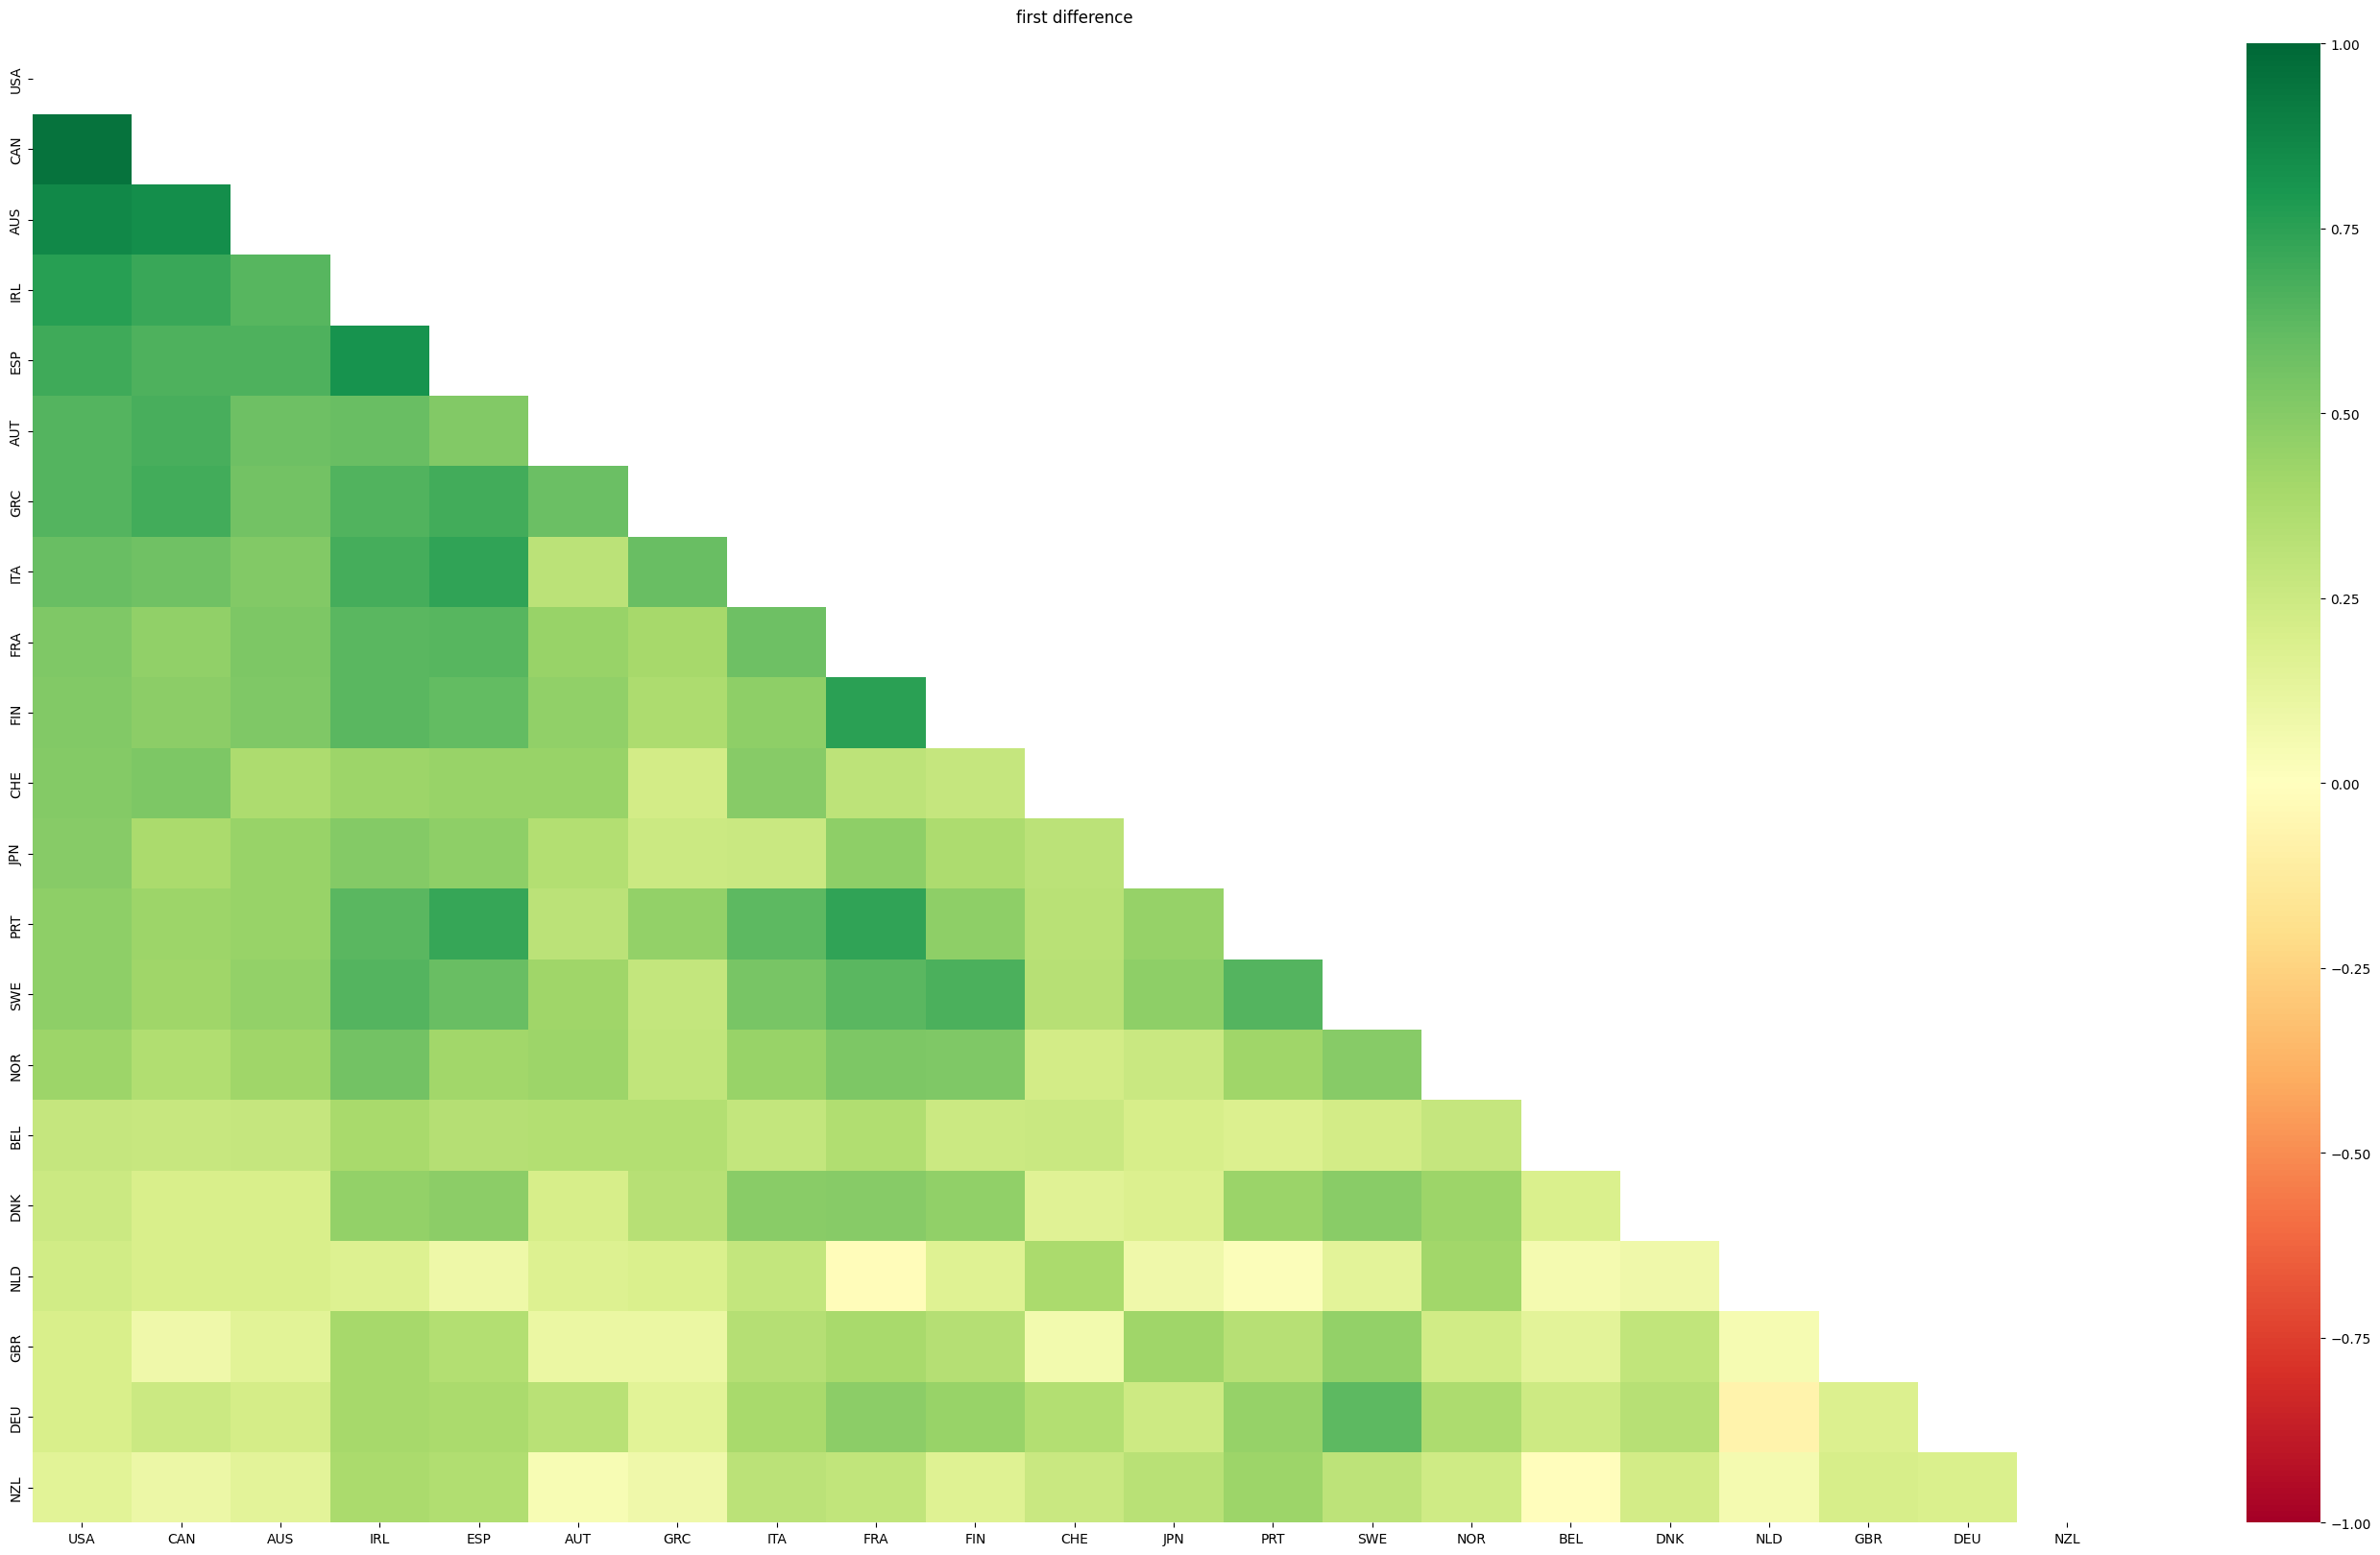

In [14]:
# show the heatmap visualisation

oecdemploymentheatmap = oecdemploymentdetrend.get_heatmap()

In [15]:
# show the reshaped version: 

oecdemploymentreshaped = oecdemploymentdetrend.get_organized()

oecdemploymentreshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,NLD,DEU,-0.073146
377,NLD,NZL,0.061160
397,GBR,DEU,0.186084
398,GBR,NZL,0.209660
419,DEU,NZL,0.191793


## IMF data: industrial production index, linear detrending

double check if i'm using the right data (should have a nice full series for all the countries?)

In [16]:
imfipidetrend = pc.Prepare_Correlations(imfipi, detrending="linear detrending", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

imfipidetrend.data.tail()

,AUT,AUS,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,GBR,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.025409,-0.004551,-0.024625,0.012318,-0.020333,-0.053564,0.018416,0.062526,-0.000136,0.009615,0.125400,0.084492,0.238299,0.038333,-0.045025,-0.040450,0.038247,0.009412,0.059891,0.039099,-0.037263
2021-01-01,-0.015818,-0.053862,0.013492,0.021887,0.017126,-0.059146,0.062995,0.070603,0.014578,0.010167,0.125317,0.139382,0.307168,0.062543,-0.016733,-0.025389,0.072962,0.013371,0.053977,0.055399,-0.030721
2021-04-01,-0.005883,-0.057197,0.098616,0.015283,0.039161,-0.067846,0.059700,0.060519,0.019299,0.007665,0.127677,0.161779,0.255422,0.071672,-0.015054,-0.011545,0.079603,0.033684,0.023516,0.063547,-0.016220
2021-07-01,0.012246,-0.062273,0.085135,0.028318,0.031478,-0.098038,0.108732,0.060141,0.038375,0.008892,0.123620,0.180184,0.303085,0.085860,-0.033930,-0.004306,0.110702,-0.035773,0.023706,0.059056,-0.008840
2021-10-01,0.051735,-0.068893,0.058698,0.042329,0.025140,-0.075606,0.148337,0.094714,0.069005,0.010458,0.110280,0.214566,0.278517,0.098044,-0.025227,-0.001597,0.084794,0.007659,0.055126,0.075011,0.001608


In [17]:
# show the correlation matrix

imfipimatrix = imfipidetrend.get_correlationmatrix()

imfipimatrix

,USA,JPN,DEU,FRA,AUT,ITA,SWE,ESP,NZL,PRT,CAN,FIN,AUS,DNK,NLD,BEL,CHE,GBR,GRC,IRL,NOR
USA,1.000000,0.841215,0.799439,0.768083,0.714980,0.596314,0.558480,0.531214,0.523404,0.462413,0.444726,0.444380,0.438057,0.432231,0.426010,0.399130,0.361861,0.195465,0.145447,0.034092,-0.016829
JPN,0.841215,1.000000,0.801586,0.791771,0.792534,0.709933,0.718626,0.676468,0.687526,0.526182,0.296583,0.670424,0.641060,0.434336,0.578133,0.587378,0.425711,0.264084,0.306117,0.072553,0.025367
DEU,0.799439,0.801586,1.000000,0.682123,0.789947,0.479366,0.448587,0.351775,0.387898,0.279313,0.140142,0.448972,0.732564,0.090545,0.659523,0.549831,0.461807,-0.144580,-0.122272,-0.224028,-0.333578
FRA,0.768083,0.791771,0.682123,1.000000,0.780210,0.909149,0.809095,0.836748,0.689244,0.815201,0.574169,0.614427,0.442721,0.675478,0.365975,0.473301,0.321851,0.523730,0.488898,0.322194,0.231623
AUT,0.714980,0.792534,0.789947,0.780210,1.000000,0.742915,0.787830,0.669366,0.552898,0.465292,0.096185,0.802830,0.776198,0.417886,0.704200,0.806719,0.616783,0.237358,0.359276,0.000506,0.016041
ITA,0.596314,0.709933,0.479366,0.909149,0.742915,1.000000,0.897600,0.923013,0.672175,0.852652,0.508371,0.728799,0.364078,0.783362,0.280573,0.535613,0.403078,0.702308,0.730869,0.486391,0.446874
SWE,0.558480,0.718626,0.448587,0.809095,0.787830,0.897600,1.000000,0.889111,0.662563,0.706480,0.336719,0.877874,0.513136,0.761218,0.393149,0.651649,0.436841,0.627520,0.731261,0.365902,0.387430
ESP,0.531214,0.676468,0.351775,0.836748,0.669366,0.923013,0.889111,1.000000,0.772422,0.884549,0.446087,0.748525,0.330745,0.815772,0.209771,0.455386,0.274030,0.802011,0.826203,0.561872,0.539221
NZL,0.523404,0.687526,0.387898,0.689244,0.552898,0.672175,0.662563,0.772422,1.000000,0.653816,0.341035,0.549052,0.369952,0.514573,0.394509,0.383369,0.074858,0.546034,0.526155,0.315146,0.292941
PRT,0.462413,0.526182,0.279313,0.815201,0.465292,0.852652,0.706480,0.884549,0.653816,1.000000,0.605532,0.458840,0.094201,0.788741,-0.028392,0.179223,0.076628,0.782761,0.702214,0.594617,0.550058


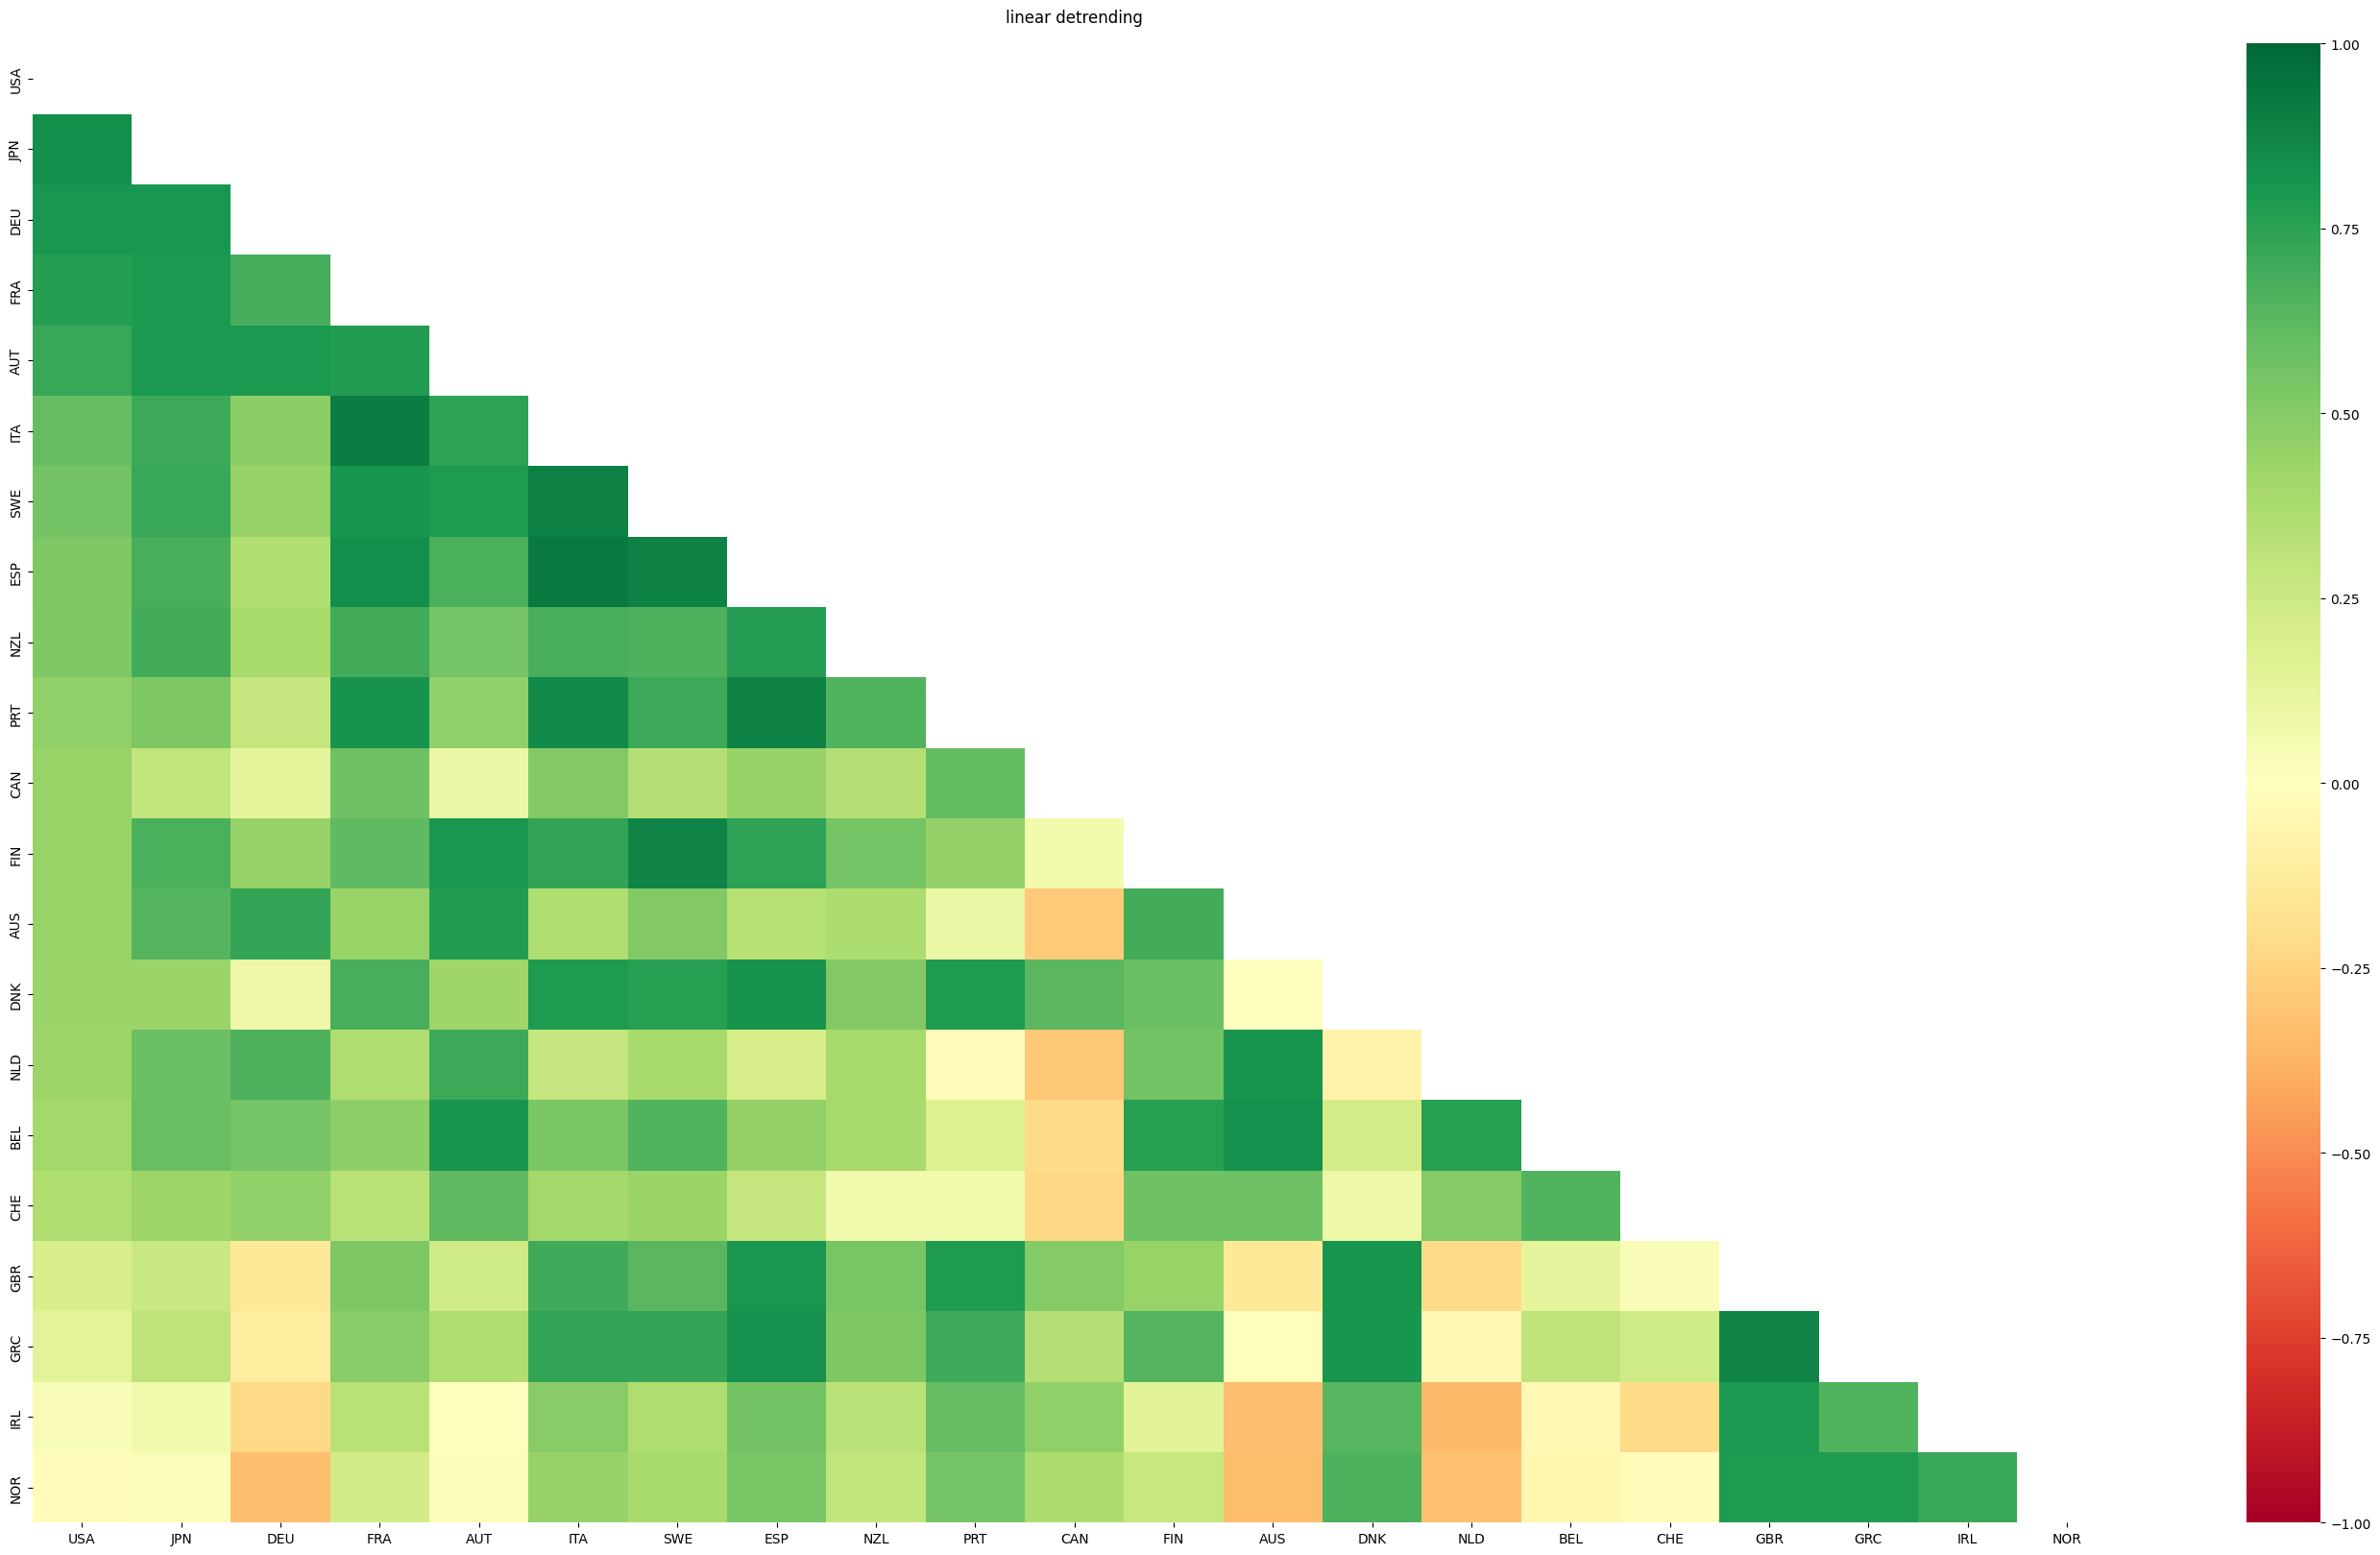

In [18]:
# show the heatmap visualisation

imfipiheatmap = imfipidetrend.get_heatmap()

In [19]:
# show the reshaped version: 

imfipireshaped = imfipidetrend.get_organized()

imfipireshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,GBR,IRL,0.792504
377,GBR,NOR,0.784399
397,GRC,IRL,0.654386
398,GRC,NOR,0.786516
419,IRL,NOR,0.718233


## Haver data: real consumption, fourth differences

In [20]:
# seasonally adjusting the consumption series (imf/oecd data are already seasonally adjusted)
rc_sa = pc.SeasonalAdjustment(pc.fixCols(rc, original_countries))

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: WARNING: The covariance matrix of the ARMA parameters is singular,
          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.
  warn(errors, X13Warning)


In [21]:
rc_detrend = pc.Prepare_Correlations(rc_sa, detrending="fourth difference", countries=list(rc_sa.columns)).detrend(start_date="1998-01-01", end_date="2021-12-31")

rc_detrend.data.tail()

,AUS,AUT,BEL,CAN,DNK,FIN,FRA,DEU,GRC,ISL,IRL,ITA,JPN,LUX,NLD,NOR,PRT,ESP,SWE,CHE,GBR,USA,BRA,CHL,HUN,IND,IDN,KOR,MEX,PER,PHL,POL,ZAF,TWN,THA,TUR,CZE
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.012572,-0.039522,-0.048952,-0.026744,0.026796,-0.031350,-0.010907,-0.042482,-0.074094,-0.023818,-0.066026,-0.029113,-0.023553,-0.010560,-0.049639,-0.012733,-0.030337,-0.040395,-0.029779,-0.001660,-0.061235,-0.007335,-0.009476,0.024424,-0.046682,0.023457,-0.048802,0.001304,-0.065304,0.004394,-0.059315,-0.019851,-0.036079,0.012530,0.001831,0.059185,-0.066025
2021-01-01,0.129966,0.048677,0.103275,0.128815,0.025155,0.072409,0.111185,0.028271,0.111222,0.095265,0.036050,0.083884,0.059231,0.196527,0.036568,0.053832,0.095390,0.156432,0.070789,0.041178,0.130022,0.122501,0.098234,0.273166,0.066628,0.328757,0.057011,0.001796,0.187932,0.195868,0.104497,0.096916,0.208323,0.054705,0.070660,0.198228,0.007057
2021-04-01,0.066606,-0.038063,-0.024640,0.006596,0.029128,0.014561,-0.044426,-0.043277,0.082239,0.024142,0.070056,0.014353,0.013472,0.008272,0.013126,-0.001487,0.023529,0.012647,0.040125,-0.007084,0.032368,0.064083,0.033972,0.165416,0.048709,-0.064964,0.044875,0.031099,0.087309,0.161081,-0.006075,0.011401,0.048238,-0.050272,-0.023530,0.026754,0.025045
2021-07-01,-0.025996,0.099424,0.103896,0.047659,0.045077,0.033149,0.065223,0.040509,0.073178,0.079029,0.093195,0.068305,-0.007599,0.052047,0.072550,0.062561,0.042705,0.025926,0.064939,0.034839,0.070237,0.060362,0.014193,0.140838,0.047046,-0.036067,-0.003846,0.045477,0.043446,0.043042,0.052399,0.085563,-0.004903,-0.043002,-0.035881,0.079716,0.109082
2021-10-01,0.021031,0.091872,0.086426,0.045585,0.085248,0.039173,0.071569,0.076563,0.064239,0.081703,0.135886,0.078397,0.019320,0.031436,0.099719,0.118603,0.099680,0.066845,0.055241,0.069835,0.111239,0.038734,0.016773,0.122666,0.054018,0.065631,0.001906,0.050582,0.027653,0.037230,0.060160,0.054551,0.012682,-0.008311,0.006399,0.184739,0.090007


In [22]:
# show the correlation matrix

rccorrelations = rc_detrend.get_correlationmatrix()

rccorrelations

,USA,MEX,ESP,GBR,ITA,CAN,SWE,PRT,AUS,FRA,ZAF,LUX,FIN,NLD,IRL,BEL,CHL,AUT,PHL,NOR,POL,CHE,GRC,JPN,DEU,HUN,PER,CZE,IND,ISL,DNK,KOR,TWN,TUR,IDN,BRA,THA
USA,1.000000,0.904197,0.898071,0.895105,0.871472,0.869906,0.843104,0.824185,0.811022,0.806508,0.804468,0.803731,0.787471,0.784426,0.777714,0.776068,0.765257,0.720178,0.718870,0.714707,0.685343,0.676293,0.660940,0.654735,0.642361,0.641792,0.638876,0.632375,0.591651,0.582303,0.534624,0.474680,0.463002,0.454618,0.445744,0.443743,0.393394
MEX,0.904197,1.000000,0.846812,0.876926,0.812991,0.894091,0.794389,0.754069,0.837103,0.738452,0.844285,0.778547,0.807371,0.712050,0.715022,0.776794,0.789986,0.684898,0.788869,0.734210,0.658057,0.670722,0.585542,0.720383,0.619871,0.571395,0.730377,0.594397,0.662133,0.533209,0.517435,0.456727,0.457005,0.437298,0.595783,0.562288,0.444321
ESP,0.898071,0.846812,1.000000,0.899624,0.912829,0.907804,0.820057,0.901562,0.842671,0.883835,0.803655,0.823991,0.833177,0.819536,0.812732,0.804696,0.675634,0.789713,0.773903,0.784532,0.743360,0.760357,0.746998,0.700447,0.721606,0.626077,0.592077,0.715400,0.675828,0.522249,0.558863,0.526201,0.533689,0.353994,0.478559,0.443447,0.416715
GBR,0.895105,0.876926,0.899624,1.000000,0.893901,0.909278,0.833262,0.844727,0.787395,0.872696,0.759142,0.794276,0.787875,0.834893,0.816692,0.886120,0.756870,0.832757,0.842164,0.846777,0.719435,0.839229,0.641626,0.747156,0.788822,0.592520,0.658304,0.730997,0.673341,0.525881,0.557089,0.493966,0.443978,0.424132,0.545900,0.460051,0.423774
ITA,0.871472,0.812991,0.912829,0.893901,1.000000,0.874163,0.868684,0.884117,0.747579,0.905056,0.707331,0.782411,0.768464,0.876885,0.826696,0.887849,0.728571,0.879100,0.764840,0.812702,0.808770,0.823731,0.652744,0.640107,0.783159,0.545052,0.632445,0.794582,0.641186,0.486155,0.545817,0.520850,0.405123,0.427148,0.439142,0.490875,0.325545
CAN,0.869906,0.894091,0.907804,0.909278,0.874163,1.000000,0.845164,0.809559,0.857415,0.890412,0.868577,0.846021,0.812969,0.758180,0.721134,0.888511,0.797333,0.821992,0.836660,0.839596,0.779104,0.784344,0.638120,0.755477,0.725820,0.489618,0.739678,0.657585,0.778442,0.493162,0.492832,0.481191,0.495047,0.485505,0.588311,0.665057,0.438083
SWE,0.843104,0.794389,0.820057,0.833262,0.868684,0.845164,1.000000,0.783781,0.748663,0.778362,0.690124,0.700303,0.710908,0.789815,0.783015,0.810364,0.715159,0.769393,0.711471,0.801391,0.647907,0.723694,0.573210,0.615523,0.671695,0.446015,0.617530,0.657146,0.543204,0.562518,0.514245,0.586005,0.479898,0.496822,0.478092,0.491914,0.272659
PRT,0.824185,0.754069,0.901562,0.844727,0.884117,0.809559,0.783781,1.000000,0.691599,0.828496,0.641056,0.734287,0.729796,0.864314,0.800938,0.783997,0.601361,0.734687,0.669732,0.709253,0.766959,0.732857,0.730468,0.568789,0.689345,0.587190,0.524548,0.726154,0.558482,0.447279,0.542282,0.493987,0.417937,0.346295,0.381950,0.398009,0.283091
AUS,0.811022,0.837103,0.842671,0.787395,0.747579,0.857415,0.748663,0.691599,1.000000,0.695227,0.858678,0.743633,0.768834,0.601113,0.625612,0.656200,0.718889,0.607914,0.723922,0.704236,0.613475,0.628531,0.570931,0.728341,0.532296,0.420427,0.744263,0.460305,0.713037,0.421413,0.386627,0.435056,0.567863,0.390179,0.625643,0.604960,0.447900
FRA,0.806508,0.738452,0.883835,0.872696,0.905056,0.890412,0.778362,0.828496,0.695227,1.000000,0.725191,0.834825,0.733332,0.793942,0.740218,0.915001,0.691713,0.877156,0.751816,0.814664,0.792445,0.869108,0.576341,0.661783,0.811805,0.437676,0.557550,0.671777,0.703008,0.429184,0.473144,0.470995,0.492227,0.449351,0.351907,0.519291,0.424481


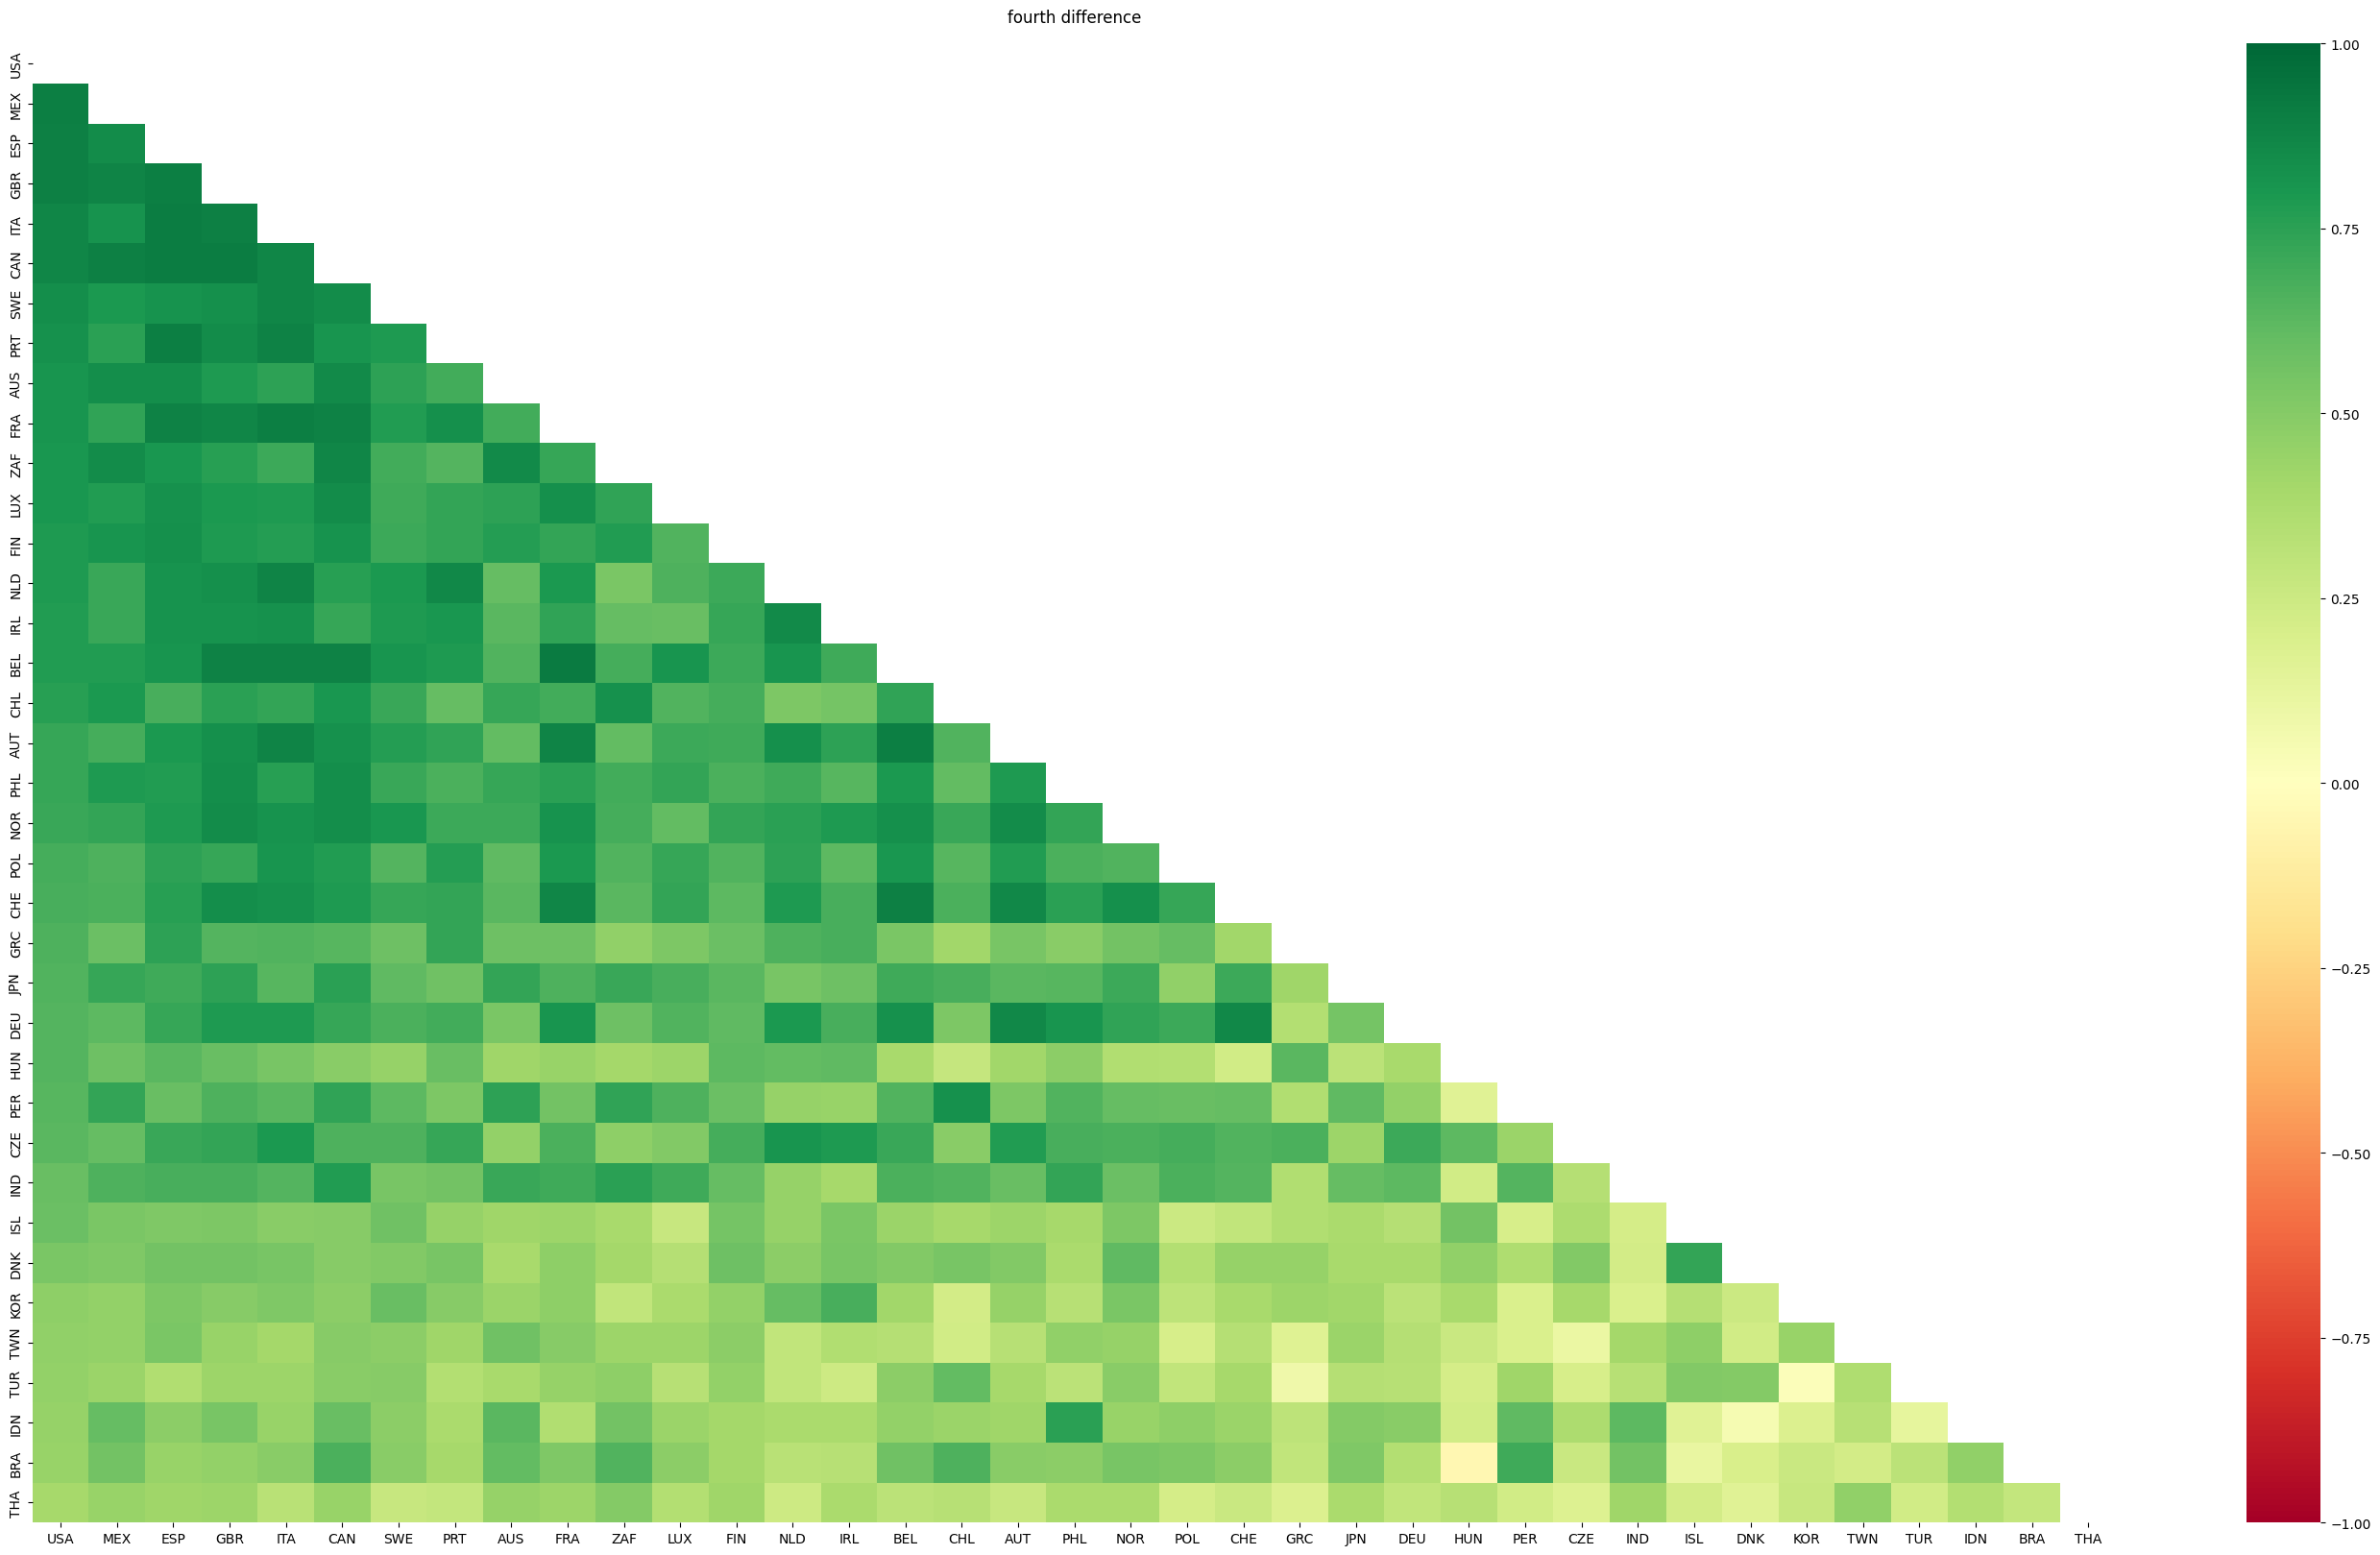

In [23]:

# show the heatmap visualisation

rcheatmap = rc_detrend.get_heatmap()

In [24]:
# show the reshaped version

rcreshaped = rc_detrend.get_organized()

rcreshaped.tail()

,iso3_firstcountry,iso3_secondcountry,correlation
1256,TUR,BRA,0.315745
1257,TUR,THA,0.227169
1293,IDN,BRA,0.466259
1294,IDN,THA,0.344544
1331,BRA,THA,0.282215


# look at some missing values that can cause issues with scipy linear detrending

In [25]:
lookatnansimf = imfipi[list(set(imfipi.columns) & set(frankelrosecountries))]
lookatnansimf = lookatnansimf.loc[(lookatnansimf.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansimf.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansimf[lookatnansimf.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_12368\2327253042.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansimf[lookatnansimf.isna().any(1)]


,DEU,FRA,ITA,JPN,PRT,NOR,NZL,CAN,ESP,AUS,FIN,IRL,USA,CHE,BEL,SWE,DNK,GRC,GBR,NLD,AUT
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,84.826325,100.424965,114.427091,100.808097,111.762827,117.238018,85.362776,101.039949,108.585343,67.916615,82.654978,51.734178,92.451261,73.800515,71.294644,90.301261,102.236210,NaN,97.868837,81.914914,66.118755
1998-04-01,84.972578,101.791517,114.767280,97.774200,113.532586,117.238018,84.820189,101.570927,109.496505,68.744976,83.907326,51.828354,93.067178,73.564419,71.790391,91.533469,101.981494,NaN,96.954175,82.751631,67.042201
1998-07-01,85.228519,101.291559,113.901345,96.567537,113.002572,114.508530,84.807571,102.336458,109.465085,68.322775,83.406387,55.438445,93.757430,73.756977,71.439237,93.428913,111.037223,NaN,94.978505,82.871639,68.076461
1998-10-01,83.912249,101.924840,112.602443,95.912491,113.276717,114.768481,83.722397,103.964121,110.784699,68.571471,83.187226,55.877935,95.116695,72.846849,70.884964,92.930643,96.263688,NaN,95.417543,82.871639,68.002586
1999-01-01,84.277879,101.724856,112.571517,97.326011,115.372403,113.631194,85.526814,105.631622,110.470505,69.556634,84.721353,59.017145,95.806203,73.370437,70.451185,93.065311,103.502188,NaN,99.259124,84.125047,68.187275
1999-04-01,85.082267,103.224731,111.829287,97.291535,116.679161,112.461413,84.302839,106.908397,111.161731,68.320594,86.192862,58.420695,96.733441,74.686600,71.136280,93.361579,100.206085,NaN,99.661575,84.211719,70.440484
1999-07-01,86.142596,104.224648,114.210608,98.705055,115.905463,115.418359,86.410095,108.687344,113.109732,68.908120,86.067627,63.223686,97.599973,76.711255,72.482372,93.795882,100.244102,NaN,101.820177,85.411791,71.326992
1999-10-01,87.202925,106.557787,115.942477,100.049622,117.644761,116.295695,88.656151,110.607653,114.837798,69.324403,88.415780,65.986190,99.324434,79.397507,73.993712,95.492692,108.463450,NaN,102.588494,86.518524,75.353218


In [26]:
lookatnansoecd = oecdemployment[list(set(oecdemployment.columns) & set(frankelrosecountries))]
lookatnansoecd = lookatnansoecd.loc[(lookatnansoecd.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd[lookatnansoecd.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_12368\1990012608.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd[lookatnansoecd.isna().any(1)]


,DEU,FRA,ITA,JPN,PRT,NOR,NZL,CAN,ESP,AUS,FIN,IRL,USA,CHE,BEL,SWE,DNK,GRC,GBR,NLD,AUT
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,51.63791,69.92259,66.53934,NaN,69.64523,68.53333,NaN,67.52502,63.94550,NaN,73.76125,NaN,NaN,NaN,NaN,55.60656,71.27648,NaN,NaN
1998-04-01,NaN,NaN,51.87399,69.59286,66.93438,NaN,69.02686,68.73333,NaN,67.72710,62.68186,NaN,73.85174,78.04481,NaN,NaN,NaN,55.85064,71.27740,NaN,NaN
1998-07-01,NaN,NaN,52.07743,69.45416,66.79893,NaN,68.99280,69.06667,NaN,67.87536,64.54234,NaN,73.81985,NaN,NaN,NaN,NaN,56.13288,71.56174,NaN,NaN
1998-10-01,NaN,NaN,52.19458,69.27718,67.12978,NaN,68.63832,69.36667,NaN,68.03831,64.99767,NaN,73.94731,NaN,NaN,NaN,NaN,56.21347,71.78155,NaN,NaN
1999-01-01,NaN,NaN,52.42956,69.08689,67.34690,NaN,69.25211,69.63333,52.92431,67.99294,65.71420,NaN,73.98904,NaN,59.19458,NaN,76.23036,56.34367,71.85828,NaN,68.66560
1999-04-01,NaN,NaN,52.60624,68.98834,67.31715,NaN,69.20969,69.86667,53.55390,68.06283,66.69583,63.08013,73.89811,78.42708,59.02541,NaN,76.28310,55.80833,71.88622,NaN,68.58568
1999-07-01,NaN,NaN,52.79292,69.01920,67.60715,NaN,69.55880,70.13333,54.12680,68.26150,66.33366,63.77315,73.86938,NaN,59.54280,NaN,76.19152,55.70330,72.11771,NaN,68.56554
1999-10-01,NaN,NaN,52.94587,68.99085,67.77253,NaN,70.19769,70.50000,54.76043,68.55662,66.36963,64.18932,74.02946,NaN,59.48914,NaN,75.45797,55.74428,72.27470,NaN,68.35089
2000-01-01,NaN,NaN,53.01252,68.75898,68.13086,77.42034,70.00667,70.86667,55.46640,68.51772,66.33025,64.62188,74.26453,NaN,60.07680,NaN,76.23196,55.97697,72.26537,71.81953,68.46355


In [27]:
lookatnansoecd_u = oecdunemployment[list(set(oecdunemployment.columns) & set(frankelrosecountries))]
lookatnansoecd_u = lookatnansoecd_u.loc[(lookatnansoecd_u.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd_u.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd_u[lookatnansoecd_u.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_12368\4105483854.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd_u[lookatnansoecd_u.isna().any(1)]


,DEU,FRA,ITA,JPN,PRT,NOR,NZL,CAN,ESP,AUS,FIN,IRL,USA,CHE,BEL,SWE,DNK,GRC,GBR,NLD,AUT
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,11.802680,3.833333,5.948345,NaN,7.396619,8.633333,NaN,7.916976,11.556580,NaN,4.722629,NaN,NaN,NaN,NaN,11.468570,6.418485,NaN,NaN
1998-04-01,NaN,NaN,12.093640,4.233333,5.242820,NaN,8.040760,8.433333,NaN,7.839725,11.685220,NaN,4.472419,3.687753,NaN,NaN,NaN,11.373110,6.329114,NaN,NaN
1998-07-01,NaN,NaN,11.954660,4.400000,5.134938,NaN,7.785223,8.300000,NaN,7.856028,11.661170,NaN,4.574889,NaN,NaN,NaN,NaN,11.451700,6.291696,NaN,NaN
1998-10-01,NaN,NaN,12.079750,4.600000,5.054001,NaN,8.040742,8.133333,NaN,7.466487,11.036510,NaN,4.425393,NaN,NaN,NaN,NaN,11.472540,6.202702,NaN,NaN
1999-01-01,NaN,NaN,11.786830,4.800000,4.789545,NaN,7.513777,7.933333,16.550450,7.160043,10.427840,NaN,4.339256,NaN,9.082825,NaN,5.420726,11.785310,6.234792,NaN,3.964338
1999-04-01,NaN,NaN,11.691530,4.933333,5.141682,NaN,7.461112,8.000000,15.852840,6.965298,10.353780,6.055307,4.290951,3.167246,9.144972,NaN,5.484908,12.415580,6.108781,NaN,3.720332
1999-07-01,NaN,NaN,11.553400,4.900000,4.644143,NaN,7.061230,7.566667,15.554960,6.948481,10.148900,5.574511,4.273862,NaN,8.331983,NaN,5.673514,12.401250,5.933633,NaN,3.609620
1999-10-01,NaN,NaN,11.204450,4.866667,4.452120,NaN,6.465258,7.066667,15.218340,6.731594,10.173790,5.279777,4.104529,NaN,7.883254,NaN,5.843270,12.687780,5.860498,NaN,3.733173
2000-01-01,NaN,NaN,11.243720,5.000000,4.452434,3.373215,6.509148,6.800000,14.533450,6.716942,10.536480,4.859990,4.087547,NaN,7.288741,NaN,5.016977,11.941690,5.852907,3.220637,4.008713


# regressions demo: working with shares data

In [28]:
# import the shares data (original version)
shares_original = pd.read_pickle(cleandatapath+'FullData_OriginalData_plusExports.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (alternative version)
shares_alt = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_TSimportShares_Taiwan.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (edited version of original)
shares_altoriginal = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_CorrectedOriginalVersion.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]


# countries with enough invoicing data (can use any version, will have the same countries)
allsharescountries = list(shares_original.dropna()['iso3'].unique())

# organize shares data
dataversions = [shares_original, shares_alt, shares_altoriginal]
dataversions_names = ['original', 'alt', 'altoriginal']
sharesdata_dict = dict.fromkeys(dataversions_names)

# put the 3 versions of the data in their own dictionary entries
for i, version in enumerate(dataversions):
    # taking the same year range as the correlation data and only using one obs per year since it is annual data
    # only consider countries that we calculated correlation coefficients for
    version = version[(version['iso3'].isin(rgdp_sa.columns)) & ((version['year'] >= 1990) & (version['year'] <= 2021))].groupby(['iso3', 'year']).first().reset_index()
    # getting the averages
    version = version[['iso3', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']].groupby(['iso3'], as_index=False).mean()
    version = version.dropna()
    version.name = dataversions_names[i]
    # print(version)
    
    sharesdata_dict[version.name] = version

In [29]:
shares_correlations_alt = reg.prepare_shares(correlation_data=rgdpreshaped, shares_data=sharesdata_dict, version='alt')

shares_correlations_alt

,iso3_firstcountry,iso3_secondcountry,correlation,Import USD_first,Import EUR_first,Export USD_first,Export EUR_first,Import USD_second,Import EUR_second,Export USD_second,Export EUR_second,prod_import,prod_export
0,USA,BEL,0.907854,98.939792,0.507429,99.531321,0.147182,16.083156,81.674340,12.374198,82.669171,0.163271,0.124379
1,USA,GBR,0.888706,98.939792,0.507429,99.531321,0.147182,14.272166,10.645941,7.899275,7.820575,0.141749,0.078738
2,BEL,GBR,0.938824,16.083156,81.674340,12.374198,82.669171,14.272166,10.645941,7.899275,7.820575,0.109904,0.074427
3,USA,FRA,0.857161,98.939792,0.507429,99.531321,0.147182,7.939810,90.990423,5.932510,92.646513,0.083173,0.060411
4,BEL,FRA,0.953072,16.083156,81.674340,12.374198,82.669171,7.939810,90.990423,5.932510,92.646513,0.755928,0.773242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,KOR,IDN,0.287447,43.070427,2.987932,31.694822,2.069987,29.211562,1.984696,26.485024,0.384930,0.126408,0.084023
492,BRA,IDN,0.391325,13.338156,1.587826,12.566527,0.457181,29.211562,1.984696,26.485024,0.384930,0.039278,0.033300
493,TWN,IDN,-0.045611,24.170890,1.791435,61.576214,1.631645,29.211562,1.984696,26.485024,0.384930,0.070962,0.163148
494,GRC,IDN,0.403062,16.960875,82.458296,11.933885,87.509288,29.211562,1.984696,26.485024,0.384930,0.065911,0.034975


In [30]:
# import consumption, centrality and nominal gdp shares
cons_ngdp_cent = pd.read_pickle(cleandatapath+'cons_ngdp_cent_for_regression.pkl')

worldcons = cons_ngdp_cent[['year', 'iso3', 'worldtotcons', 'totcons']]
cent = cons_ngdp_cent[['year', 'iso3', 'cent_exp']]
ngdpshares = cons_ngdp_cent[['year', 'iso3', 'gdpshare']]

# list of countries with consumption data
allconsumptioncountries = list(worldcons.dropna()['iso3'].unique())

# list of countries with centrality data
allcentcountries = list(cent.dropna()['iso3'].unique())

# list of countries with gdp share data
allngdpcountries = list(ngdpshares.dropna()['iso3'].unique())

# taking the same year range as the correlation data
# only consider countries that we calculated correlation coefficients for
worldcons = worldcons[(worldcons['iso3'].isin(rgdp_sa.columns)) & ((worldcons['year'] >= 1990) & (worldcons['year'] <= 2021))]
cent = cent[(cent['iso3'].isin(rgdp_sa.columns)) & ((cent['year'] >= 1990) & (cent['year'] <= 2021))]
ngdpshares = ngdpshares[(ngdpshares['iso3'].isin(rgdp_sa.columns)) & ((ngdpshares['year'] >= 1990) & (ngdpshares['year'] <= 2021))]

# define dataframe to put all the data into
correlations_covariates_alt = shares_correlations_alt.copy()

# make columns
correlations_covariates_alt['prod_worldconscorr'] = np.nan
correlations_covariates_alt['prod_ngdpshare'] = np.nan
correlations_covariates_alt['prod_cent'] = np.nan

# calculate covariates for each row (which already has each unique country pair)
for index, row in correlations_covariates_alt.iterrows():
    countryA = row['iso3_firstcountry']
    countryB = row['iso3_secondcountry']

    worldcorr_countryA = worldcons[worldcons['iso3'] == countryA][['totcons', 'worldtotcons']].corr()['totcons'][-1]
    worldcorr_countryB = worldcons[worldcons['iso3'] == countryB][['totcons', 'worldtotcons']].corr()['totcons'][-1]
    ngdpshare_countryA = ngdpshares[ngdpshares['iso3'] == countryA]['gdpshare'].mean()
    ngdpshare_countryB = ngdpshares[ngdpshares['iso3'] == countryB]['gdpshare'].mean()
    cent_countryA = cent[cent['iso3'] == countryA]['cent_exp'].mean()
    cent_countryB = cent[cent['iso3'] == countryB]['cent_exp'].mean()

    correlations_covariates_alt.at[index, 'prod_worldconscorr'] = worldcorr_countryA*worldcorr_countryB
    correlations_covariates_alt.at[index, 'prod_ngdpshare'] = ngdpshare_countryA*ngdpshare_countryB
    correlations_covariates_alt.at[index, 'prod_cent'] = cent_countryA*cent_countryB

# import bti
bti = pd.read_pickle(cleandatapath+'bti_for_regression.pkl')

# find average across years for each pair
bti = bti[['iso3_o', 'iso3_d', 'bti']].groupby(['iso3_o', 'iso3_d'], as_index=False).mean()

# merge bti with correlation data
bti.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)
correlations_covariates_alt = pd.merge(left=correlations_covariates_alt, right=bti, on=['iso3_firstcountry', 'iso3_secondcountry'], how='inner')

In [31]:
correlations_covariates_alt[['iso3_firstcountry', 'iso3_secondcountry', 'correlation', 'prod_import', 'prod_export', 'prod_worldconscorr', 'prod_ngdpshare', 'prod_cent', 'bti']]

,iso3_firstcountry,iso3_secondcountry,correlation,prod_import,prod_export,prod_worldconscorr,prod_ngdpshare,prod_cent,bti
0,USA,BEL,0.907854,0.163271,0.124379,0.964634,0.002302,1.077078e-05,0.002281
1,USA,GBR,0.888706,0.141749,0.078738,0.920382,0.011358,5.956612e-05,0.006003
2,USA,FRA,0.857161,0.083173,0.060411,0.919074,0.013465,5.280712e-05,0.003963
3,GBR,FRA,0.931814,0.108200,0.077141,0.869865,0.002279,5.506991e-05,0.014119
4,USA,DNK,0.848856,0.146751,0.113760,0.948452,0.001327,1.862852e-05,0.000579
...,...,...,...,...,...,...,...,...,...
426,ISL,IDN,0.163945,0.053880,0.054571,0.857787,0.000002,4.972508e-07,0.000018
427,KOR,IDN,0.287447,0.126408,0.084023,0.932518,0.000146,2.088852e-05,0.007386
428,BRA,IDN,0.391325,0.039278,0.033300,0.846065,0.000188,6.871230e-06,0.000716
429,GRC,IDN,0.403062,0.065911,0.034975,0.943741,0.000037,3.398004e-06,0.000239


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            correlation   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     56.91
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.21e-22
Time:                        10:03:50   Log-Likelihood:                 196.96
No. Observations:                 431   AIC:                            -387.9
Df Residuals:                     428   BIC:                            -375.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5481      0.011     52.118      0.000       0.527       0.569
prod_import     0.1937      0.032      5.987      0.000       0.130       0.257
bti            12.1045      1.855      6.525      0.000       8.458      15.751
==============================================================================
Omnibus:                       23.623   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.125
Skew:                          -0.598   Prob(JB):                     2.12e-06
Kurtosis:                       3.162   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

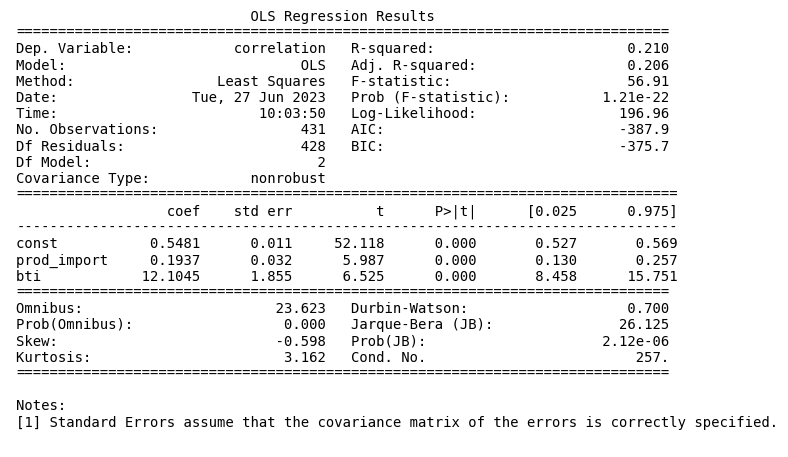

In [32]:
reg.Regressions(correlations_covariates_alt, dependent_var=['correlation'], independent_vars=['prod_import', 'bti']).run_regression(method='OLS').summary()

# regressions demo: working with instrumental variables

In [41]:
# import the frankel and rose data (the original data is in a stata dataset)
instruments = pd.read_stata(ocadatapath + 'DATAV4.dta')[['period', 'count1', 'count2', 'distance', 'adjacent', 'ling', 'wt']]

# Load dataframe with IMF country code in 'IMF' column and iso3 country code in 'iso3' column
country_code_mapping = pd.read_csv(rawdatapath+'Country_iso_codes.csv')
country_code_mapping = country_code_mapping[['iso3','IMF']]

# Make a dictionary out of the dataframe
dict = country_code_mapping.set_index('IMF').to_dict()['iso3']

# Replace IMF country codes in CountryCode and PartnerCode columns
# by corresponding ISO3 country codes
instruments['count1']= instruments['count1'].map(dict)
instruments['count2']= instruments['count2'].map(dict)

# get value over entire time period (the stata data is split up by four time periods, each a few years long)
# this gets the mean correlation and trade intensity over all 4 periods
instruments = instruments.groupby(['count1', 'count2']).mean().reset_index()
instruments.rename(columns={'count1': 'iso3_firstcountry', 'count2': 'iso3_secondcountry'}, inplace=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                     wt   R-squared:                       1.000
Model:                         IV2SLS   Adj. R-squared:                  1.000
Method:                     Two Stage   F-statistic:                 2.602e+31
                        Least Squares   Prob (F-statistic):               0.00
Date:                Tue, 27 Jun 2023                                         
Time:                        10:32:25                                         
No. Observations:                 210                                         
Df Residuals:                     208                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.624e-18    5.4e-18      1.781      0.076   -1.03e-18    2.03e-17
wt             1.0000   1.96e-16    5.1e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      228.355   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7538.308
Skew:                           4.364   Prob(JB):                         0.00
Kurtosis:                      31.024   Cond. No.                         39.0
==============================================================================
"""

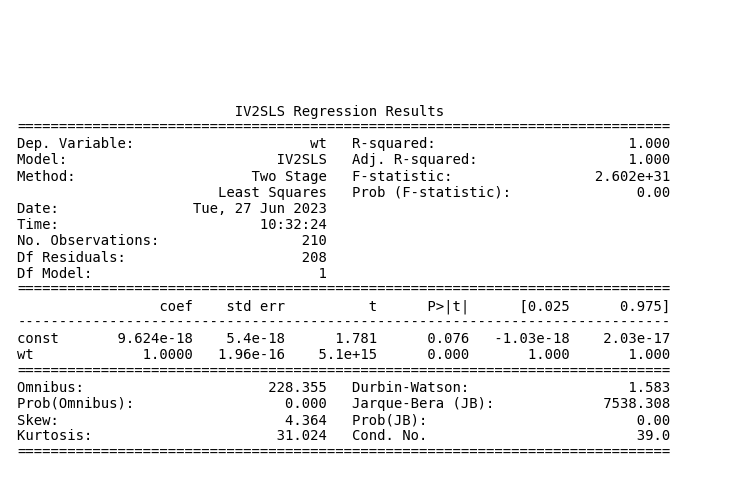

In [43]:
reg.Regressions(instruments, dependent_var=['wt'], independent_vars=['wt']).run_regression(method='IV', instrument_vars=['distance', 'adjacent', 'ling']).summary()